In [1]:
library(Seurat)


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built with package 'Matrix' 1.7.0 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [2]:
seurat_obj_spatial <- readRDS("./inp/GSE235672_GBM.spatial.rds")

In [9]:
seurat_obj_spatial

An object of class Seurat 
61924 features across 44829 samples within 2 assays 
Active assay: SCT (23700 features, 0 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: Spatial
 34 images present: sliceGSZ, sliceGSZ.1, sliceHKL, sliceHKL.1, sliceLBZSLH, sliceLBZ, sliceLLS, sliceLLS.1, sliceLXY, sliceLXY.1, sliceOSH, sliceOSH.1, sliceLBZSLH.1, sliceSLH, sliceTXFYLX, sliceTXF, sliceXQX, sliceYJX, sliceYJX.1, sliceTXFYLX.1, sliceYLX, sliceYY, sliceYY.1, sliceZLR, sliceZMT, sliceZMT.1, sliceLZH, sliceLZH.1, sliceHYX, sliceHYX.1, sliceWL, sliceWL.1, sliceLJL, sliceLJL.1

In [8]:
head(seurat_obj_spatial@meta.data)

,nCount_Spatial,nFeature_Spatial,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters,Pt_number,Pt_number_region,condition,treatment_1,treatment_3,WHO,gender,IDH,age,region
,<dbl>,<int>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AAACAAGTATCTCCCA-1_1,14105,4527,6034,2984,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para
AAACCCGAACGAAATC-1_1,3937,2043,4707,2046,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para
AAAGTGTGATTTATCT-1_1,10212,3832,6379,3488,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para
AAAGTTGACTCCCGTA-1_1,12267,4246,6273,3257,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para
AAATCTAGCCCTGCTA-1_1,12896,4349,6186,3161,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para
AAATTCCAGGTCCAAA-1_1,4210,2226,4761,2224,0,0,Pt_12,Pt12 para,recurrence,TMZ,TMZ_para,four,female,WT,below60,para


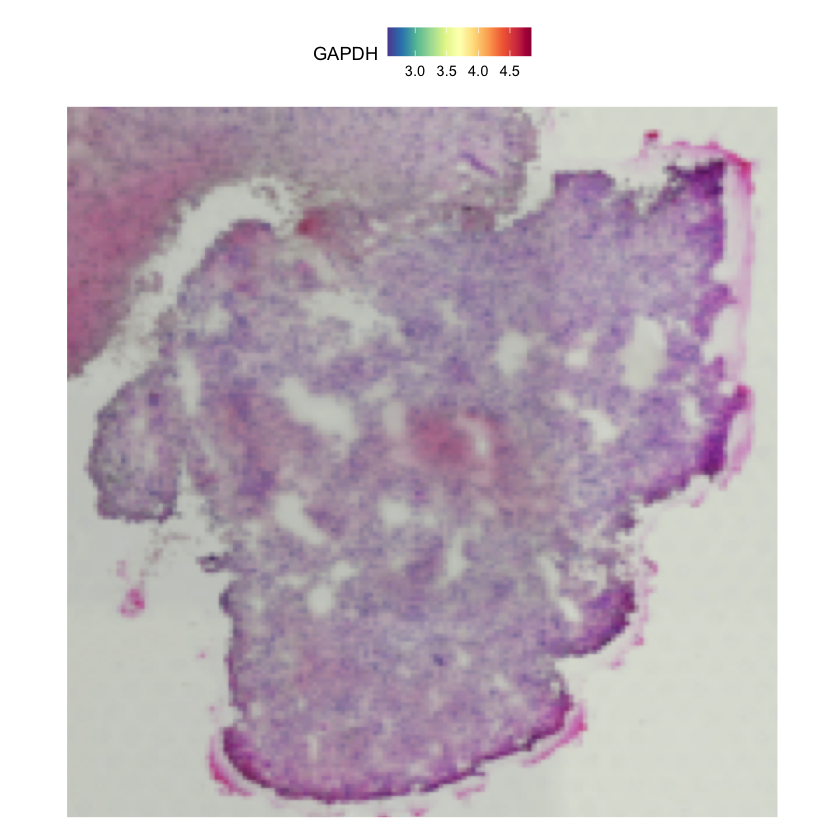

In [4]:
SpatialFeaturePlot(seurat_obj_spatial, features = "GAPDH", images = "sliceGSZ")


In [5]:
getwd()

[1] "/Users/shiwani/Documents/GITHUB/Pediatric_Immuno-Oncology/Notebooks/Spatial"

In [6]:
seurat_obj_rnaseq <- readRDS("../Clustering/out/clustered_harmony.rds")

In [7]:
library(BayesSpace)
library(Seurat)
library(dplyr)
library(tidyverse)
library(BayesSpace)
library(purrr)
library(janitor)
library(magrittr)
library(patchwork)
library(stringr)
library(R.utils)


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.4.1"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps

In [10]:
source("scripts/functions.R")

In [12]:
seurat_obj_spatial <- preProcessSeuratObjectSpatial(seurat_obj_spatial, normalization = "LogNormalize")

ERROR: Error: vector memory limit of 16.0 Gb reached, see mem.maxVSize()


In [13]:
variable_genes <- VariableFeatures(seurat_obj_spatial)
head(variable_genes)

ERROR: Error: object 'seurat_obj_spatial' not found


In [ ]:
variable_genes_rnaseq <- VariableFeatures(seurat_obj_rnaseq)
head(variable_genes)

In [ ]:
seurat_obj_rnaseq <- SetIdent(seurat_obj_rnaseq, value = "RNA_snn_res.0.1")
seurat_obj_rnaseq$subclass <- seurat_obj_rnaseq$RNA_snn_res.0.1


In [ ]:
seurat_obj_spatial <- anchorMapping(seurat_obj_spatial, feats=variable_genes_rnaseq, GBM.Seurat, query.dims=20, anchor.labels=levels(as.factor(seurat_obj_spatial$subclass)))

## Data Visualization. 

In [ ]:
scplots <- purrr::map(levels(as.factor(seurat_obj_rnaseq$subclass)), function(x) SpatialFeaturePlot(seurat_obj_spatial, x) +

theme(legend.key.size = unit(10, "mm"),
  legend.text = element_text(size = 15),
  legend.title = element_text(size = 20)))

patchwork::wrap_plots(scplots, ncol=4) %T>% ggsave(filename = "figures/Seurat/siglec_mapped.pdf", width = 25, height = 25, units = "in", dpi = 300, create.dir = TRUE)